<h1>Импорт библиотек

In [16]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [17]:
import numpy as np
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    n = X[0].shape[0]
    result = np.zeros((n, 1))
    
    for i in range(len(X)):
        result = result + np.dot(X[i], V[i])
    
    return result

def tests():
    assert np.allclose(sum_prod([np.array([[10, 20], [30, 40]])], [np.array([[5], [10]])]), np.array([[250], [550]])), "Ошибка в тесте 1"
    assert np.allclose(sum_prod([np.array([[1, 0], [0, 1]]), np.array([[2, 0], [0, 2]])], [np.array([[1], [1]]), np.array([[1], [1]])]), np.array([[3], [3]])), "Ошибка в тесте 2"
    print("Все тесты пройдены успешно")

tests()

Все тесты пройдены успешно


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [18]:
import numpy as np

def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def tests():
    assert np.array_equal(binarize(np.array([[0.1, 0.6, 0.4], [0.9, 0.2, 0.7]])), np.array([[0, 1, 0], [1, 0, 1]])), "Ошибка в тесте 1"
    assert np.array_equal(binarize(np.array([[5, 6, 7], [3, 4, 8]]), 5), np.array([[0, 1, 1], [0, 0, 1]])), "Ошибка в тесте 2"
    print("Все тесты пройдены успешно")

tests()


Все тесты пройдены успешно


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [19]:
import numpy as np

def unique_rows(mat):
    return [np.unique(r) for r in mat]

def unique_columns(mat):
    return [np.unique(c) for c in mat.T]

def tests():
    mat1 = np.array([[1, 2, 3],
                     [1, 1, 2],
                     [3, 3, 3]])
    
    assert all(np.array_equal(res, exp) for res, exp in zip(unique_rows(mat1), [np.array([1, 2, 3]), np.array([1, 2]), np.array([3])])), "Ошибка в тесте 1"
    assert all(np.array_equal(res, exp) for res, exp in zip(unique_columns(mat1), [np.array([1, 3]), np.array([1, 2, 3]), np.array([2, 3])])), "Ошибка в тесте 2"
    print("Все тесты пройдены успешно")

tests()


Все тесты пройдены успешно


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Статистика по столбцам:
Столбец 0: матожидание = -0.1321, дисперсия = 0.9323
Столбец 1: матожидание = -0.7705, дисперсия = 0.6249
Столбец 2: матожидание = -0.0841, дисперсия = 0.1031
Столбец 3: матожидание = 0.1236, дисперсия = 0.4369
Статистика по строкам:
Строка 0: матожидание = 0.1233, дисперсия = 0.1545
Строка 1: матожидание = -0.4005, дисперсия = 0.8481
Строка 2: матожидание = -0.3701, дисперсия = 0.7329


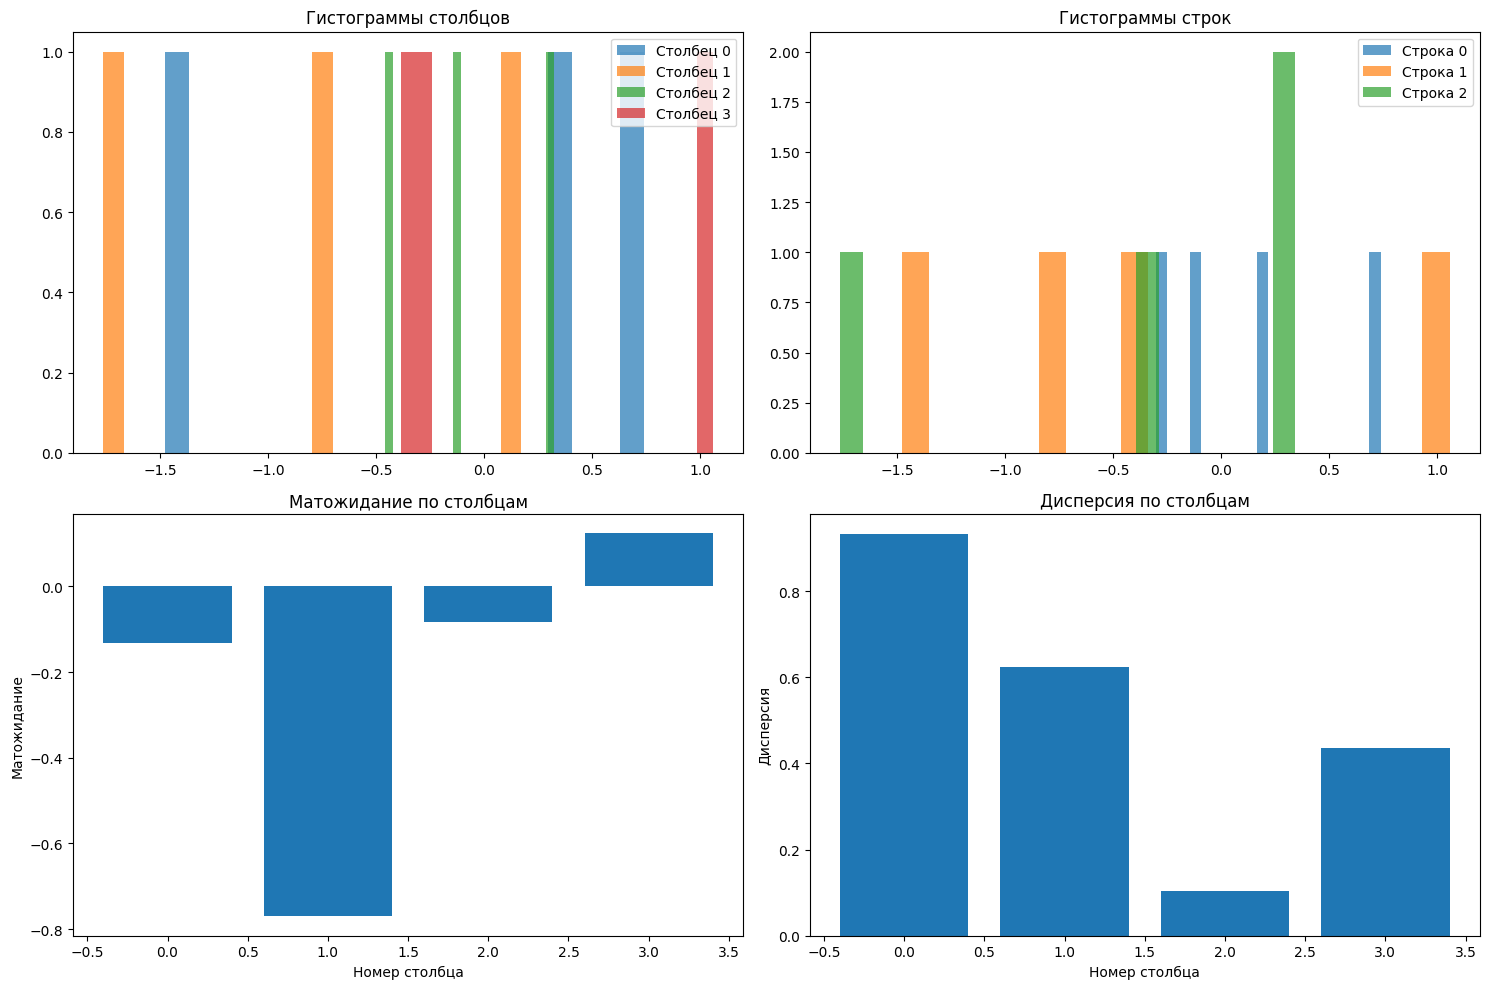

Все тесты пройдены успешно


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_matrix(m, n, mean=0, std=1):
    matrix = np.random.normal(mean, std, (m, n))
    
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    print("Статистика по столбцам:")
    for i in range(n):
        print(f"Столбец {i}: матожидание = {col_means[i]:.4f}, дисперсия = {col_vars[i]:.4f}")
    
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    
    print("Статистика по строкам:")
    for i in range(m):
        print(f"Строка {i}: матожидание = {row_means[i]:.4f}, дисперсия = {row_vars[i]:.4f}")
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    for i in range(min(n, 5)):
        plt.hist(matrix[:, i], alpha=0.7, label=f'Столбец {i}', bins=20)
    plt.title('Гистограммы столбцов')
    plt.legend()

    plt.subplot(2, 2, 2)
    for i in range(min(m, 5)): 
        plt.hist(matrix[i, :], alpha=0.7, label=f'Строка {i}', bins=20)
    plt.title('Гистограммы строк')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.bar(range(n), col_means)
    plt.title('Матожидание по столбцам')
    plt.xlabel('Номер столбца')
    plt.ylabel('Матожидание')
    
    plt.subplot(2, 2, 4)
    plt.bar(range(n), col_vars)
    plt.title('Дисперсия по столбцам')
    plt.xlabel('Номер столбца')
    plt.ylabel('Дисперсия')
    
    plt.tight_layout()
    plt.show()
    
    return matrix

def tests():
    mat1 = analyze_matrix(3, 4)
    assert mat1.shape == (3, 4), "Ошибка в тесте 1"
    assert mat1.dtype == np.float64, "Ошибка в тесте 2"
    print("Все тесты пройдены успешно")

tests()


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [21]:
import numpy as np

def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=type(a))
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
                
    return matrix

def tests():
    assert np.array_equal(chess(2, 2, 0, 1), np.array([[0, 1], [1, 0]])), "Ошибка в тесте 1"
    assert np.array_equal(chess(3, 3, 'A', 'B'), np.array([['A', 'B', 'A'], ['B', 'A', 'B'], ['A', 'B', 'A']])), "Ошибка в тесте 2"
    print("Все тесты пройдены успешно")

tests()


Все тесты пройдены успешно


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

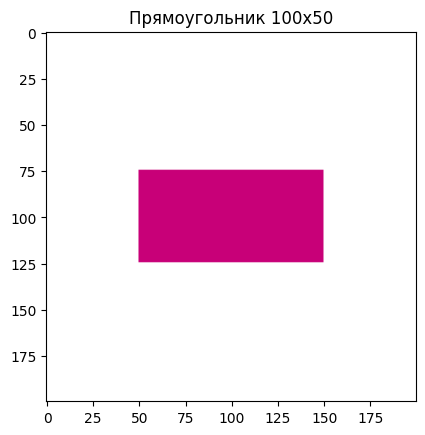

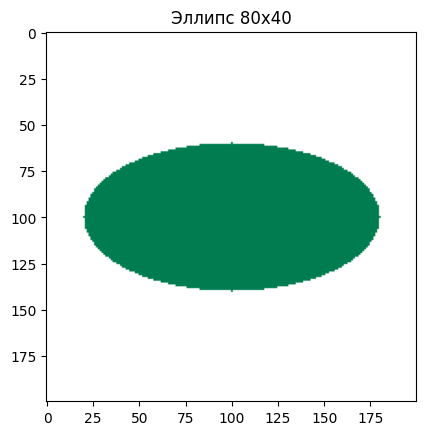

In [22]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    
    x_start = (n - a) // 2
    y_start = (m - b) // 2
    x_end = x_start + a
    y_end = y_start + b
    
    x_start = max(0, x_start)
    y_start = max(0, y_start)
    x_end = min(n, x_end)
    y_end = min(m, y_end)
    
    image[y_start:y_end, x_start:x_end] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    
    x0, y0 = n // 2, m // 2
    
    for y in range(m):
        for x in range(n):
            if ((x - x0) ** 2) / (a ** 2) + ((y - y0) ** 2) / (b ** 2) <= 1:
                image[y, x] = ellipse_color
    
    return image

def tests():
    rect1 = draw_rectangle(100, 50, 200, 200, (200, 0, 120), (255, 255, 255))
    plt.imshow(rect1)
    plt.title("Прямоугольник 100x50")
    plt.show()

    ellipse1 = draw_ellipse(80, 40, 200, 200, (0, 125, 80), (255, 255, 255))
    plt.imshow(ellipse1)
    plt.title("Эллипс 80x40")
    plt.show()
tests()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [23]:
import numpy as np

np.random.seed(42)
time_series = np.random.rand(50)

mean_value = np.mean(time_series)
var_value = np.var(time_series)
deviation = np.std(time_series)

print(f"Среднее: {mean_value:.4f}\nДисперсия: {var_value:.4f}\nСтандартное отклонение: {deviation:.4f}")

is_max = (time_series[1:-1] > time_series[:-2]) & (time_series[1:-1] > time_series[2:])
is_min = (time_series[1:-1] < time_series[:-2]) & (time_series[1:-1] < time_series[2:])

local_max = np.where(is_max)[0] + 1
local_min = np.where(is_min)[0] + 1

print(f"Локальные максимумы (значения): {time_series[local_max]}")
print(f"Локальные минимумы (значения): {time_series[local_min]}")

p = 10
moving_average = np.convolve(time_series, np.ones(p)/p, 'valid')

print(f"\nСкользящее среднее (окно={p}): {moving_average}")

def tests():
    assert 0 <= mean_value <= 1, "Ошибка в тесте 1"
    assert len(moving_average) == len(time_series) - p + 1, "Ошибка в тесте 2"
    print("Все тесты пройдены успешно")

tests()


Среднее: 0.4459
Дисперсия: 0.0818
Стандартное отклонение: 0.2860
Локальные максимумы (значения): [0.95071431 0.86617615 0.70807258 0.96990985 0.52475643 0.61185289
 0.78517596 0.59241457 0.60754485 0.96563203 0.68423303 0.49517691
 0.9093204  0.66252228 0.54671028]
Локальные минимумы (значения): [0.05808361 0.60111501 0.02058449 0.18182497 0.29122914 0.13949386
 0.19967378 0.04645041 0.06505159 0.09767211 0.12203823 0.03438852
 0.25877998 0.31171108]

Скользящее среднее (окно=10): [0.52013674 0.48474117 0.48666073 0.4967056  0.45807366 0.46065429
 0.46339529 0.48801116 0.45386918 0.43695218 0.39526784 0.45439468
 0.37135308 0.31732328 0.33272556 0.36015006 0.4203272  0.40987036
 0.40881816 0.42486511 0.40038724 0.39995644 0.40305946 0.38035016
 0.43860253 0.48955873 0.49188087 0.50237487 0.46071864 0.46990048
 0.50927069 0.46072003 0.49318531 0.490119   0.48616249 0.41547728
 0.40088977 0.4015995  0.4438391  0.43008682 0.40455702]
Все тесты пройдены успешно


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [24]:
import numpy as np

def one_hot_encoding(labels):
    labels = np.array(labels)
    n_classes = np.max(labels) + 1
    n_samples = len(labels)
    
    one_hot = np.zeros((n_samples, n_classes), dtype=int)
    one_hot[np.arange(n_samples), labels] = 1
    
    return one_hot

labels1 = [0, 2, 3, 0]
result1 = one_hot_encoding(labels1)
print(result1)


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
